In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv(r"https://raw.githubusercontent.com/Govind155/House-Price-Prediction/main/phishing.csv")

In [8]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1


In [9]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [10]:
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1


In [11]:
df.shape

(11054, 32)

In [73]:
# Print correlation with target variable
print(df.corr()['class'].sort_values())

DomainRegLen          -0.225879
ShortURL              -0.067931
AbnormalURL           -0.060751
HTTPSDomainURL        -0.040096
Redirecting//         -0.038885
WebsiteForwarding     -0.020151
IframeRedirection     -0.003362
Favicon               -0.000231
UsingPopupWindow       0.000136
Index                  0.000802
DisableRightClick      0.012675
InfoEmail              0.018039
LinksPointingToPage    0.032694
NonStdPort             0.036461
StatusBarCust          0.041878
Symbol@                0.052994
LongURL                0.057661
DNSRecording           0.075579
StatsReport            0.079632
UsingIP                0.094033
PageRank               0.104593
AgeofDomain            0.121402
GoogleIndex            0.129000
ServerFormHandler      0.221380
LinksInScriptTags      0.248415
RequestURL             0.253478
SubDomains             0.298231
WebsiteTraffic         0.346003
PrefixSuffix-          0.348588
AnchorURL              0.692895
HTTPS                  0.714704
class   

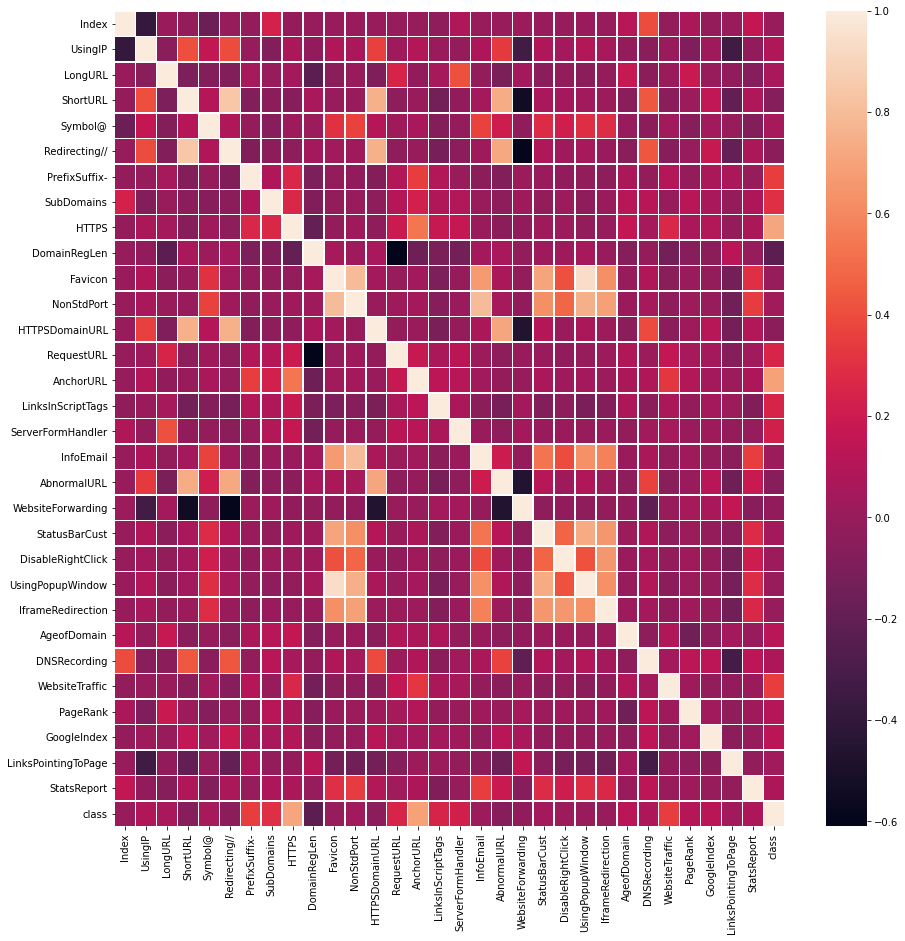

In [74]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

In [12]:
df.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score

In [14]:
X= df.drop(columns='class')
X.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,LinksInScriptTags,ServerFormHandler,InfoEmail,AbnormalURL,WebsiteForwarding,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1


In [15]:
Y=df['class']
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [16]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [17]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 31)
(3317, 31)
(7737, 1)
(3317, 1)


**Lets apply Logistic Regression and check its accuracy**

In [18]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
logreg_predict= model_1.predict(test_X)

In [21]:
accuracy_score(logreg_predict,test_Y)

0.9276454627675611

In [22]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [23]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

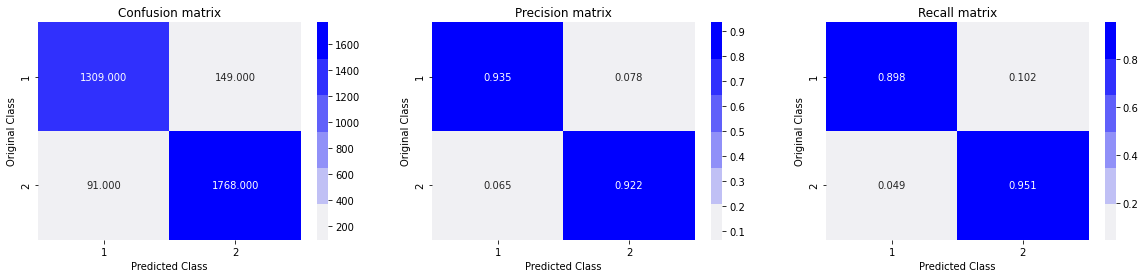

In [24]:
plot_confusion_matrix(test_Y, logreg_predict)

**Lets apply K-Nearest Neighbors Classifier and check its accuracy**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [27]:
knn_predict=model_2.predict(test_X)

In [28]:
accuracy_score(knn_predict,test_Y)

0.6343081097377148

In [29]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.63      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.63      0.63      0.63      3317



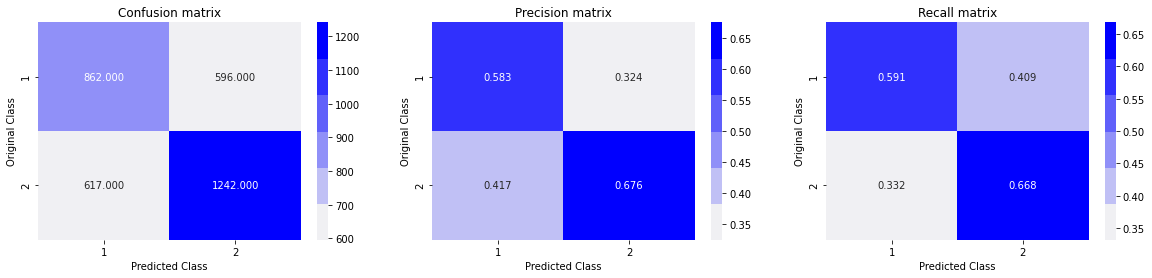

In [30]:
plot_confusion_matrix(test_Y, knn_predict)

**Lets apply Decision Tree Classifier and check its classifier **

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)

In [33]:
dtree_predict=model_3.predict(test_X)

In [34]:
accuracy_score(dtree_predict,test_Y)

0.9469400060295448

In [35]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1418
           1       0.96      0.94      0.95      1899

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



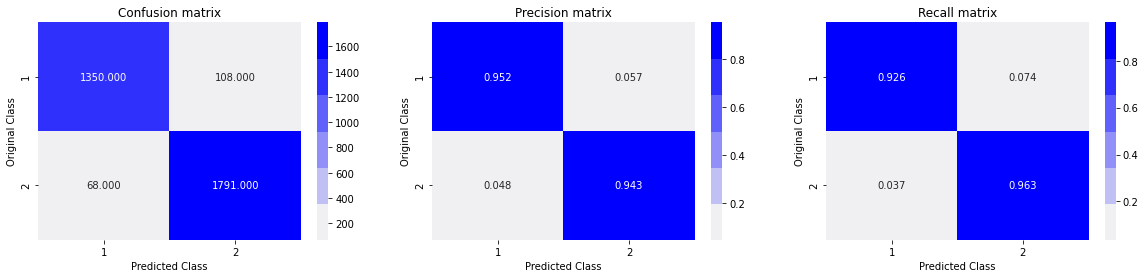

In [36]:
plot_confusion_matrix(test_Y, dtree_predict)

**Lets apply Random Forest Classifier and check its accuracy**

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [39]:
rfc_predict=model_4.predict(test_X)

In [40]:
accuracy_score(rfc_predict,test_Y)

0.9716611395839614

In [41]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1438
           1       0.98      0.97      0.97      1879

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



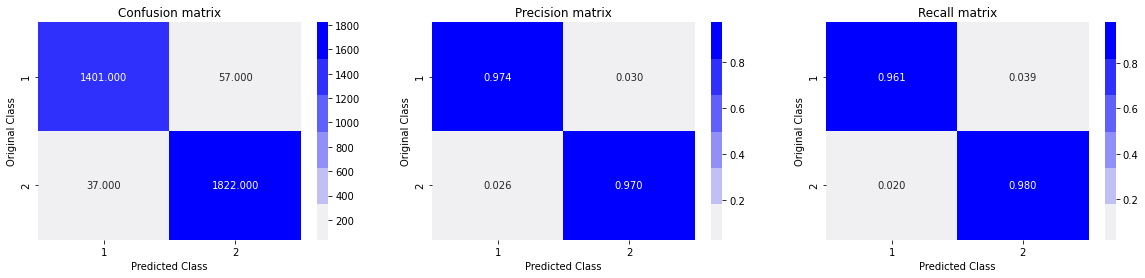

In [42]:
plot_confusion_matrix(test_Y, rfc_predict)

**Lets Apply SVM and check its accuracy**

In [43]:
from sklearn.svm import SVC

In [44]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
svm_predict=model_5.predict(test_X)

In [46]:
accuracy_score(svm_predict,test_Y)

0.5604461863129334

In [47]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


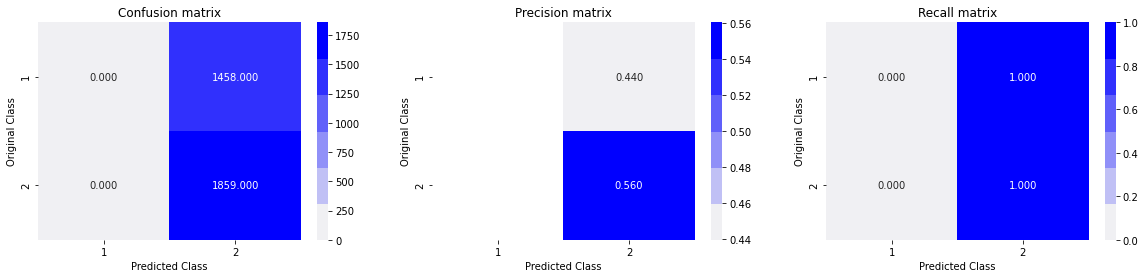

In [48]:
plot_confusion_matrix(test_Y, svm_predict)

**Lets apply AdaBoost Classifier and check its accuracy **

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
adc_predict=model_6.predict(test_X)

In [52]:
accuracy_score(adc_predict,test_Y)

0.9104612601748568

In [53]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



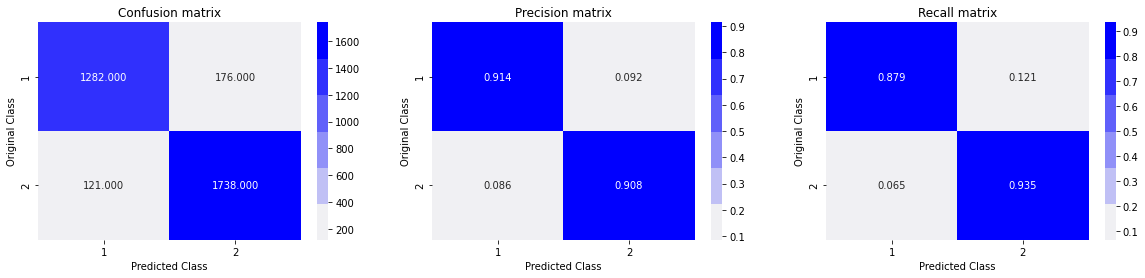

In [54]:
plot_confusion_matrix(test_Y, adc_predict)

Lets apply XGBoost Classifier and check its accuracy

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb=XGBClassifier()
model_7=xgb.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
xgb_predict=model_7.predict(test_X)

In [58]:
accuracy_score(xgb_predict,test_Y)

0.9472414832680133

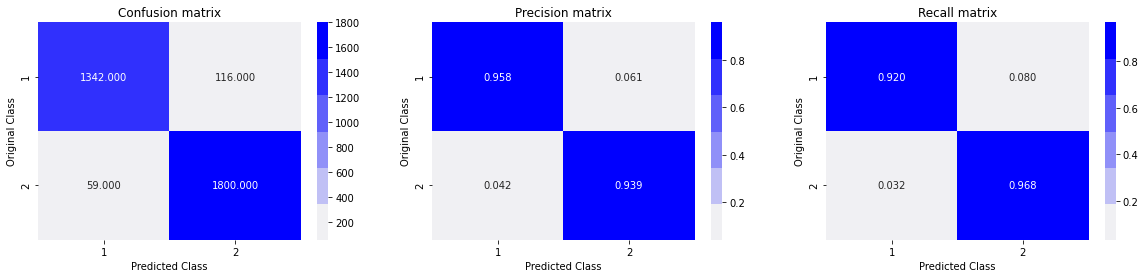

In [59]:
plot_confusion_matrix(test_Y, xgb_predict)

In [60]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,test_Y))
print('XGBoost Accuracy:',accuracy_score(xgb_predict,test_Y))

Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6343081097377148
Decision Tree Classifier Accuracy: 0.9469400060295448
Random Forest Classifier Accuracy: 0.9716611395839614
support Vector Machine Accuracy: 0.5604461863129334
Adaboost Classifier Accuracy: 0.9104612601748568
XGBoost Accuracy: 0.9472414832680133


From all the models we developed , Random forest accuracy has highest accuracy and followed by decision tree and XGBoost. Lowest accuracy model is SVM. 

Now lets consider only two imporatant features Prefix_Suffix and URL_of_Anchor.

In [61]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [62]:
X=df[['PrefixSuffix-','AnchorURL']]
X.head()

,PrefixSuffix-,AnchorURL
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [63]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

In [64]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 2)
(3317, 2)
(7737, 1)
(3317, 1)


Now lets apply logistic Regression for this new model which is having only two features

In [65]:
model_8=logreg.fit(train_X,train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
logreg_predict=model_8.predict(test_X)

In [67]:
accuracy_score(test_Y,logreg_predict)

0.8411214953271028

In [68]:
logreg.classes_

array([-1,  1])

In [69]:
x = np.array(X)
x

array([[-1,  0],
       [-1,  0],
       [-1,  0],
       ...,
       [-1,  0],
       [-1, -1],
       [-1, -1]])

In [70]:
X = X.to_numpy()
y = df['class']
y= y.to_numpy()

Now lets plot the decision boundary 

In [71]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


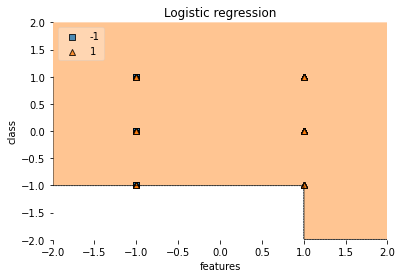

In [72]:
plot_decision_regions(x, y, clf=model_1, legend=2)

# Adding axes annotations
plt.xlabel('features')
plt.ylabel('class')
plt.title('Logistic regression')
plt.show()